# Análise OD-2023
## Overview
As seguintes análises foram feitas:
- Análise comparativa dos meios de transporte da OD 23 (quais os meios mais/menos utilizados) 
- Caracterização do Perfil do Pedestre - perfil demográfico
  - Distribuição por sexo
  - Distribuição por idade
  - Distribuição por grau de instrução
  - Distribuição por condição de atividade
  - Distribuição por renda individual
  - Relação entre renda individual e grau de instrução
- Análise Específica do Comportamento como Pedestre
  - Razões para caminhar
  - Motivos de viagem (destino)

### TODO
- Comparar região metropolitana e municipal (verificar se coordenadas de origem e destino estão dentro da zona municipal)
- Comparar OD-17 vs OD-23

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.models import meios_transporte, criterio_br

In [ ]:
data_path = "../data/OD/OD-2023/od23_all.csv"
df = pd.read_csv(data_path)
# df.columns

In [ ]:
df.head()

## Comparação dos meios de transporte (OD-2023)

Colunas importantes:
- FE_VIA: fator de viagem
- MODOPRIN: modo principal de viagem da pessoa

In [ ]:
print(meios_transporte)

In [ ]:
meios_fatorexp = df.groupby('MODOPRIN')['FE_VIA'].sum()
meios_fatorexp = meios_fatorexp.sort_values()

In [ ]:
meios_fatorexp.index = meios_fatorexp.index.map(lambda x: meios_transporte.get(x, "Desconhecido"))

In [ ]:
plt.figure(figsize=(12, 8))
meios_fatorexp.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Soma de FE_VIA (em milhões)')
plt.ylabel('Meios de Transporte')
plt.title('Distribuição de Viagens por Meio de Transporte')

for index, value in enumerate(meios_fatorexp):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center')  

plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x/1e6)}M' for x in plt.xticks()[0]])

plt.tight_layout()  
plt.show()

In [ ]:
meios_fatorexp_normalizado = (meios_fatorexp / meios_fatorexp.sum()) * 100

plt.figure(figsize=(12, 8))
meios_fatorexp_normalizado.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Percentual (%)')
plt.ylabel('Meios de Transporte')
plt.title('Distribuição Percentual de Viagens por Meio de Transporte')

for index, value in enumerate(meios_fatorexp_normalizado):
    plt.text(value + 0.1, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()

### Análise comparativa percentual entre os meios de transporte

Com os gráficos acima, observa-se que os meios de transporte mais utilizados são, em ordem decrescente: a pé, dirigindo automóvel, e ônibus(e derivados) do município de São Paulo.

- A pé - 27.7%
- Dirigindo automóvel - 21.0% 
- Ônibus(e derivados) do município de São Paulo - 10.7%

## Caracterização do Perfil do Pedestre

Colunas importantes:
- FE_PESS: fator expansão da pessoa ('peso da linha')
- MODOPRIN: modo principal

01: Metrô, 02: Trem, 03:Monotrilho, 04: Ônibus/micro-ônibus/van do município de São Paulo, 05: Ônibus/micro-ônibus/van de outros municípios, 06: Ônibus/micro-ônibus/van metropolitano, 07: Transporte Fretado, 08: Transporte Escolar, 09: Dirigindo Automóvel, 10: Passageiro de Automóvel, 11: Táxi Convencional, 12: Táxi não Convencional / aplicativo, 13: Dirigindo Moto, 14: Passageiro de Moto, 15: Passageiro de Mototáxi, 16: Bicicleta, 17: A Pé, 18: Outros

- IDADE
- SEXO

1: Masculino, 2: Feminino, 3: Não respondeu


- ESTUDA: estuda atualmente

1: Não, 2: Creche/Pré-Escola, 3: 1º Grau /Fundamental, 4: 2º Grau/Médio, 5: Superior/Universitário, 6: Outros

- GRAU_INS: grau de instrução

1: Não Alfabetizado/Fundamental I Incompleto, 2: Fundamental I Completo/Fundamental II Incompleto, 3: Fundamental II Completo/Médio Incompleto, 4: Médio Completo/Superior Incompleto, 5: Superior Completo

- CD_ATIVI: condição atividade (trabalho regular, bico...)

1: Tem trabalho regular, 2: Faz bico, 3: Em Licença Médica, 4: Aposentado/Pensionista, 5: Sem Trabalho, 6: Nunca Trabalhou, 7: Dona de Casa, 8: Estudante

- VL_REN_I: valor da renda individual

- MOTIVO_D: motivo no destino

1: Trabalho Indústria, 2: Trabalho Comércio, 3: Trabalho Serviços, 4: Escola/Educação, 5: Compras, 6: Médico/Dentista/Saúde, 7: Recreação/Visitas/Lazer, 8: Residência, 9: Procurar Emprego, 10: Assuntos Pessoais, 11: Refeição

- PE_BICI: por que viajou a pé ou bicicleta

1: Pequena distância, 2: Condução cara, 3: Ponto/Estação distante, 4: Condução demora para passar, 5: Viagem demorada, 6: Condução lotada, 7: Atividade física, 8: Medo de contágio, 9: Outros motivos

- DISTANCIA: distância da viagem em metros

- CRITERIOBR: Critério de Classificação Econômica Brasil

1: A, 2: B1, 3: B2, 4: C1, 5: C2, 6: D e E

- RACA: raça

1: Branca, 2: Preta, 3: Amarela, 4: Parda, 5: Indígena, 6: Sem declaração

Tabelas de contingência entre sexo e modo de transporte

In [ ]:
pd.crosstab(df['SEXO'], df['MODOPRIN'], normalize='index')

Filtrando apenas viagens a pé

In [ ]:
# Filtrando pedestres
pedestrians = df.query('MODOPRIN == 17').copy()

### Pré-processamento dos Dados
**Categorização:**
- Faixas etárias
- Distâncias percorridas
- Critério BR
- Sexo
- Raça

In [ ]:
# Categorização da distância (em metros)
bins_distancia = [0, 500, 1000, 2000, 5000, float('inf')]
labels_distancia = ['Muito curta (<500m)', 'Curta (500-1000m)', 'Média (1001-2000m)', 
                   'Longa (2001-5000m)', 'Muito longa (>5000m)']

pedestrians['CAT_DISTANCIA'] = pd.cut(pedestrians['DISTANCIA'], bins=bins_distancia, labels=labels_distancia)

In [ ]:
# Categorização de idade
bins_idade = [0, 12, 18, 30, 50, 65, 120]
labels_idade = ['Criança (0-12)', 'Adolescente (13-18)', 'Jovem (19-30)', 
               'Adulto (31-50)', 'Adulto 50+ (51-65)', 'Idoso (65+)']

pedestrians['CAT_IDADE'] = pd.cut(pedestrians['IDADE'], bins=bins_idade, labels=labels_idade)

In [ ]:
# Mapeamento dos critérios econômicos
pedestrians['CLASSE_ECON'] = pedestrians['CRITERIOBR'].map(criterio_br)
pedestrians['CLASSE_ECON'].value_counts()

In [ ]:
# Mapeamento do sexo
sexo_labels = {1: 'Masculino', 2: 'Feminino'}
pedestrians['SEXO_LABEL'] = pedestrians['SEXO'].map(sexo_labels)

In [ ]:
# Mapeamento da raça
raca_labels = {1:"Branca", 2:"Preta", 3:"Amarela", 4:"Parda", 5:"Indígena", 6:"Sem declaração"}
pedestrians['RACA_LABEL'] = pedestrians['RAÇA'].map(raca_labels)

Peso (FE_PESS) total de pedestres

In [ ]:
pedestrians_weight = pedestrians['FE_VIA'].sum()

### Análise Descritiva Básica
**Perfil demográfico**
- Distribuição por sexo (SEXO)
- Distribuição por idade (IDADE)
- Distribuição por raça (RAÇA)
- Distribuição por grau de instrução (GRAU_INS)

**Características socioeconômicas**
- Distribuição por condição de atividade (CD_ATIVI)
- Distribuição de renda (VL_REN_I)
- Relação entre renda e modo pedestre

In [ ]:
sexo_dist = pedestrians.groupby('SEXO_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por sexo (%):\n", sexo_dist.round(2))

In [ ]:
sexo_dist_normalized = sexo_dist / sexo_dist.sum() * 100
sexo_dist_normalized.plot(kind='bar', title='Distribuição por Sexo (Pedestres)', ylabel='%')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
idade_stats = pedestrians['IDADE'].describe()
print("\nEstatísticas de idade (pedestres):\n", idade_stats.round(2))

In [ ]:
idade_cat_dist = (pedestrians.groupby('CAT_IDADE', observed=False)['FE_VIA'].sum() / pedestrians_weight * 100).reindex(labels_idade)
idade_cat_dist.plot(kind='bar', edgecolor='black')

plt.title('Distribuição por Idade de Pedestres')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(idade_cat_dist.round(2))

In [ ]:
raca_dist = pedestrians.groupby('RACA_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por raça (%):\n", raca_dist.round(2))

In [ ]:
raca_dist_normalized = raca_dist / raca_dist.sum() * 100
raca_dist_normalized.plot(kind='bar', title='Distribuição por Raça dos Pedestres', ylabel='%', xlabel="Raça")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
grau_labels = {
    1: 'Fundamental I Incompleto',
    2: 'Fundamental I Comp. / Fund II Incomp.',
    3: 'Fundamental II Comp. / Médio Incomp.',
    4: 'Médio Comp. / Sup. Incompleto',
    5: 'Superior Completo'
}
pedestrians['GRAU_LABEL'] = pedestrians['GRAU_INS'].map(grau_labels)

grau_dist = pedestrians.groupby('GRAU_LABEL')['FE_VIA'].sum()

grau_dist_normalized = grau_dist / grau_dist.sum() * 100

grau_dist_normalized = grau_dist_normalized.sort_values(ascending=False)

grau_dist_normalized.plot(kind='barh', title='Grau de Instrução dos Pedestres', xlabel='Percentual')
plt.tight_layout()
plt.show()


In [ ]:
print(grau_dist_normalized.round(2))

In [ ]:
atividade_labels = {
    1: 'Trabalho regular',
    2: 'Bico',
    3: 'Licença médica',
    4: 'Aposentado',
    5: 'Sem trabalho',
    6: 'Nunca trabalhou',
    7: 'Dona de casa',
    8: 'Estudante'
}
pedestrians['ATIVI_LABEL'] = pedestrians['CD_ATIVI'].map(atividade_labels)

ativi_dist = pedestrians.groupby('ATIVI_LABEL')['FE_VIA'].sum()

ativi_dist_normalized = ativi_dist / ativi_dist.sum() * 100

ativi_dist_normalized = ativi_dist_normalized.sort_values(ascending=False)

ativi_dist_normalized.plot(kind='bar', title='Condição de Atividade dos Pedestres (%)', ylabel='Percentual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
print(ativi_dist_normalized.round(2))

In [ ]:
renda_stats = pedestrians['VL_REN_I'].describe()
p95_renda_stats = pedestrians['VL_REN_I'].quantile(0.95)
print("\nEstatísticas da renda individual (pedestres):\n", renda_stats.round(2))

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=pedestrians, x='VL_REN_I')
plt.title('Violinplot da Renda Individual de Pedestres')
plt.xlabel('Renda (R$)')
plt.xlim(0, p95_renda_stats)
plt.tight_layout()
plt.show()

In [ ]:
renda_grau = pedestrians.groupby('GRAU_LABEL')['VL_REN_I'].mean().sort_values()
renda_grau.plot(kind='barh', title='Renda Média por Grau de Instrução de Pedestres', xlabel='Renda Média (R$)')
plt.tight_layout()
plt.show()

In [ ]:
print(renda_grau.round(2))

**Sumário - Análise do perfil demográfico dos pedestres**
1. Distribuição por Sexo
- Feminino: 56,02%
- Masculino: 43,92%

2. Distribuição por Faixa Etária
- Idade média: 32,5 ano
- Mediana (Q2): 31 anos
- Faixa etária predominante: 31 a 50 anos, com 28,57%
- Segunda maior faixa: 0 a 12 anos, com 24,10%
- Menor faixa: 65 anos ou mais, representando apenas 3,58%

3. Distribuição por Raça/Cor
- Branca: 49,01% (maior proporção)
- Parda: 38,96%
- Preta: 10,03%
- Amarela: 1,21%
- Indígena: 0,29% (menor proporção)

4. Distribuição por Grau de Instrução
- Faixa predominante: Ensino médio completo ou superior incompleto (29,06%)
- Faixa menos representada: Superior completo (11,92%)

5. Distribuição por Condição de Atividade
- Principal grupo: Pessoas com trabalho regular (37,73%)
- Segundo maior grupo: Estudantes (33,48%)

6. Distribuição da Renda Individual
- Renda média: R$ 1.643,54
- 3º quartil (Q3): R$ 1.900,00

7. Renda Individual Média por Grau de Instrução (Q95)
- Superior completo: R$ 7.203,04
- Médio completo / Superior incompleto: R$ 1.718,64

### Análise Específica do Comportamento como Pedestre
**Motivações**
- Razões para caminhar (PE_BICI)
- Motivos de viagem (MOTIVO_D)

**Padrões de deslocamento**
- Distribuição de distâncias percorridas (DISTANCIA)
- Relação entre distância e motivo da viagem
- Relação entre distância e características demográficas

**Análise da Escolha pelo Meio A Pé (PE_BICI)**

In [ ]:
pe_bici_labels = {1:"Pequena distância", 2:"Condução cara", 3:"Ponto/Estação distante", 4:"Condução demora para passar", 5:"Viagem demorada", 6:"Condução lotada", 7:"Atividade física", 8:"Medo de contágio", 9:"Outros motivos"}
pedestrians["PE_BICI_LABEL"] = pedestrians["PE_BICI"].map(pe_bici_labels)

In [ ]:
pe_bici_dist = pedestrians.groupby('PE_BICI_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por PE_BICI (%):\n", pe_bici_dist.round(2))

In [ ]:
pe_bici_dist_normalized = pe_bici_dist / pe_bici_dist.sum() * 100
pe_bici_dist_normalized = pe_bici_dist_normalized.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
pe_bici_dist_normalized.plot(
    kind='bar',
    title='Distribuição dos Motivos Declarados para a Escolha do Deslocamento a Pé',
    ylabel='%',
    xlabel="Motivos Declarados"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Análise Motivo do deslocamento no Destino (MOTIVO_D)**

In [271]:
motivo_labels = {1:"Trabalho Indústria", 2:"Trabalho Comércio", 3:"Trabalho Serviços", 4:"Escola/Educação", 5:"Compras", 6:"Médico/Dentista/Saúde", 7:"Recreação/Visitas/Lazer", 8:"Residência", 9:"Procurar Emprego", 10:"Assuntos Pessoais", 11:"Refeição"
}
pedestrians["MOTIVO_LABEL"] = pedestrians["MOTIVO_D"].map(motivo_labels)

In [272]:
motivo_d_dist = pedestrians.groupby('MOTIVO_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por motivo de deslocamento ao destino (%):\n", motivo_d_dist.round(2))

Distribuição por motivo de deslocamento ao destino (%):
 MOTIVO_LABEL
Assuntos Pessoais           1.30
Compras                     2.02
Escola/Educação            30.31
Médico/Dentista/Saúde       1.00
Procurar Emprego            0.02
Recreação/Visitas/Lazer     1.40
Refeição                    1.86
Residência                 47.39
Trabalho Comércio           3.76
Trabalho Indústria          2.25
Trabalho Serviços           8.70
Name: FE_VIA, dtype: float64


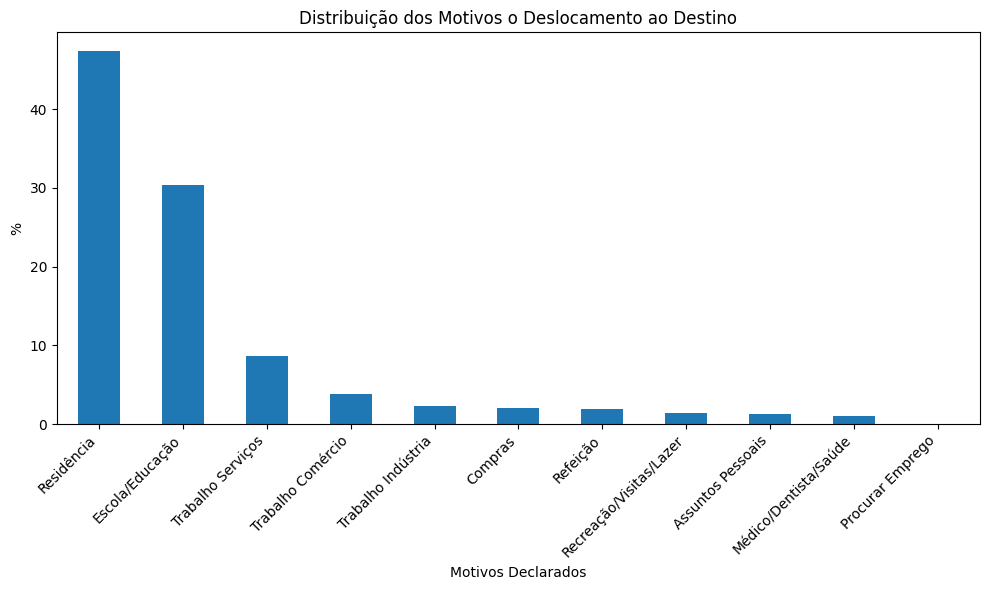

In [273]:
motivo_d_dist_normalized = motivo_d_dist / motivo_d_dist.sum() * 100
motivo_d_dist_normalized = motivo_d_dist_normalized.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
motivo_d_dist_normalized.plot(
    kind='bar',
    title='Distribuição dos Motivos o Deslocamento ao Destino',
    ylabel='%',
    xlabel="Motivos Declarados"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()